In [1]:
# Import modules
import sys
import os
import pandas as pd

In [2]:
# Append the project root path to sys.path
sys.path.append(os.path.abspath("../scripts"))

In [3]:
# Import Custom Module
import Brent_analysis as ba

In [4]:
# Load and Clean Data
file_path = "../data/BrentOilPrices.csv"
df_raw = ba.load_data(file_path)
df_raw.head()

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-10\scripts\Brent_analysis.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=["Date"], dayfirst=True)


Loaded Sucessfully. 



,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [5]:
df_cleaned = ba.clean_data(df_raw)


Cleaned DataFrame

Cleaned Data:
         Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


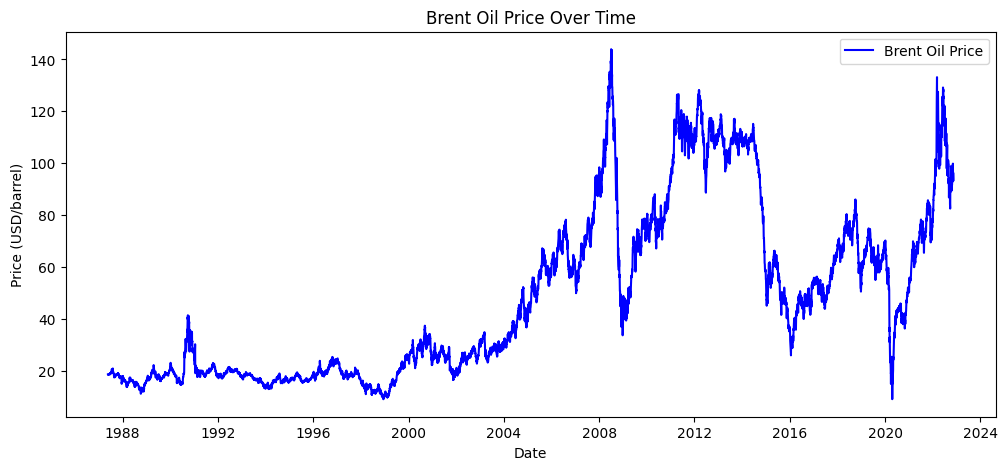

In [6]:

# Exploratory Data Analysis

ba.plot_price_series(df_cleaned)

In [7]:
ba.check_stationarity(df_cleaned)


Augmented Dickey-Fuller Test:
ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Critical Values 1%: -3.4310783342658615
Critical Values 5%: -2.861861876398633
Critical Values 10%: -2.566941329781918


In [8]:

# Fit ARIMA Model

arima_order = (1,1,1)
arima_results = ba.fit_arima_model(df_cleaned, order=arima_order)


In [9]:
# Print ARIMA Model Summary
print(arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                12963
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14781.951
Date:                Fri, 21 Feb 2025   AIC                          29569.903
Time:                        21:25:08   BIC                          29592.312
Sample:                    05-20-1987   HQIC                         29577.392
                         - 11-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2999      0.063      4.775      0.000       0.177       0.423
ma.L1         -0.3767      0.060     -6.322      0.000      -0.493      -0.260
sigma2         1.2621      0.006    196.204      0.0

In [10]:
# Change Point Detection

cp_breaks = ba.detect_change_points(df_cleaned, penalty=10.0)
print(f"\nDetected change points at indices: {cp_breaks}")


Detected change points at indices: [820, 935, 2695, 3100, 4220, 4370, 4600, 5090, 5200, 5315, 5415, 5445, 5595, 5695, 5980, 6035, 6340, 6925, 6985, 7155, 7350, 7700, 7840, 7990, 8330, 8380, 8540, 8640, 8815, 8940, 9011]


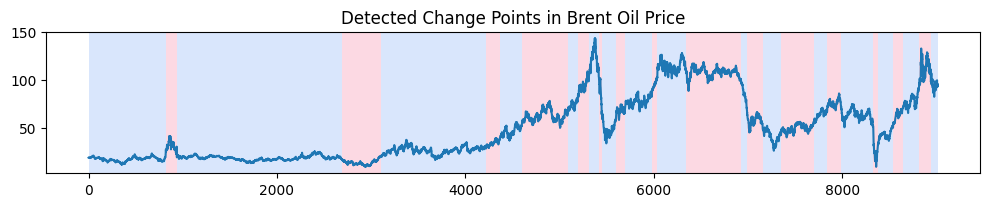

In [11]:
# Plot Change Points
ba.plot_change_points(df_cleaned, cp_breaks)

In [12]:
ba.save_results_to_csv(df_cleaned, cp_breaks, arima_results)


Results saved to analysis_results.csv and ARIMA summary saved to analysis_results.txt
